# <center> PHY 102 Lab - Accelerating Charge</center>
### <center>University of Mount Union</center>

## Cell 1
Run this code once, then ignore it for the rest of the activity.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.widgets import Slider
from scipy.integrate import odeint
# use widget on the online binder; notebook
# may work better on a local machine:
#%matplotlib notebook
%matplotlib widget

# Functions
def derivs(params,t):
    # Solves ODE for motion of particle q
    x,v = params
        
    # derivative of position is velocity
    x_deriv = v
    # derivative of velocity is acceleration... 
    v_deriv = q*E/m
    
    #...but only if we're inside the region with the field
    if x<left_edge or x>right_edge:
        v_deriv = 0
    
    return x_deriv,v_deriv

def update(val):
    # Used to update animated figure
    marker_q.set_offsets([xpoints[time_slider.val],
                          ypoints[time_slider.val]])
    marker_q2.set_offsets([tpoints[time_slider.val],
                           vpoints[time_slider.val]])
    fig.canvas.draw_idle()
  

## Cell 2
Edit **just** the top portion of the code below. 

<IPython.core.display.Javascript object>


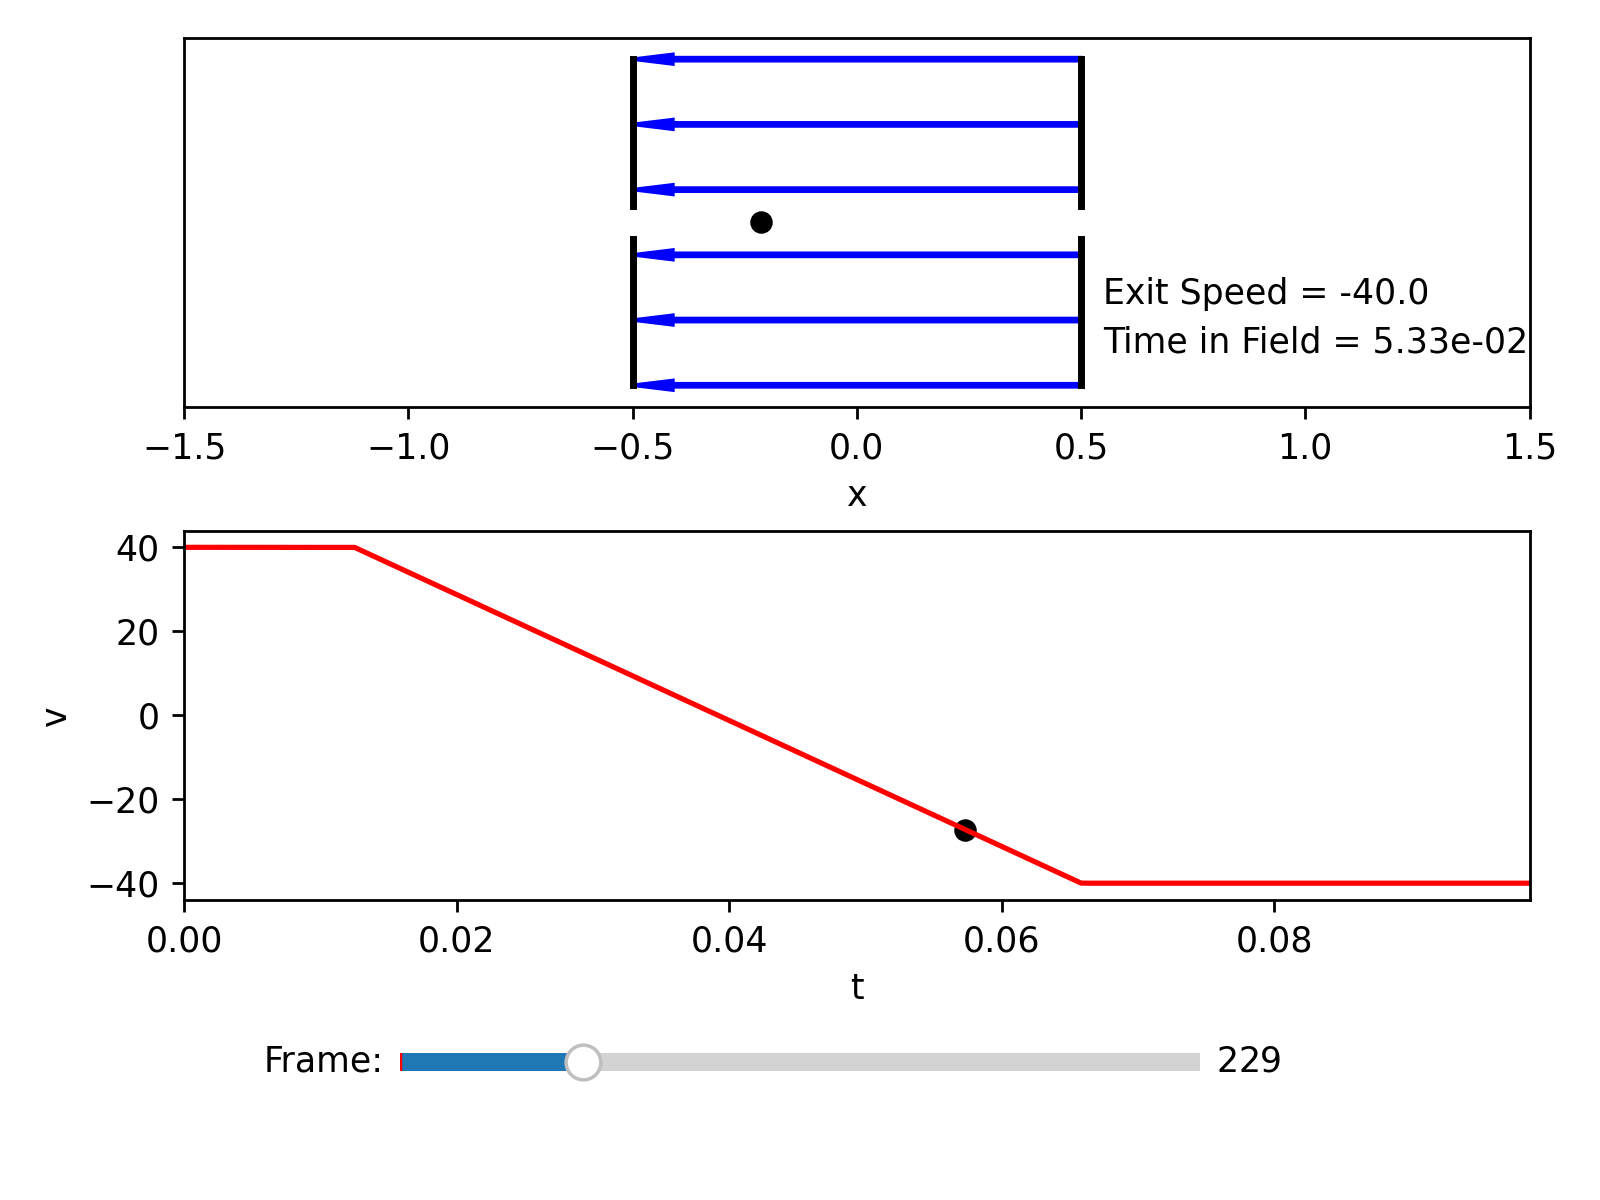

In [2]:
#Parameter values (edit these!)
q = 1         # Default: 1
E = -1500     # Default: 1500
m = 1         # Default: 1
v0 = 40 

left_edge = -0.5     # region of nonzero E field
right_edge = 0.5     # defaults are -0.5 and 0.5

# ====================================
# Don't edit anything below this line!
# ====================================

x0 = -1.0                               # initial position, velocity      
time_in,time_out = 0,0                  # track when the particle enters/exits the field

# Obtain simulation results data
tpoints = np.linspace(0,0.25,1000)      # time
ypoints = np.zeros(1000)                # no motion in vertical
output = odeint(derivs,[x0,v0],tpoints) # solve ODE
xpoints = output[:,0]                   # parse out x positions for q
vpoints = output[:,1]                   # parse out x velocities for q

# Find time in, time out
time_in_index = np.argwhere(xpoints>left_edge)
time_in_index = time_in_index[0][0] # first instance inside
if max(xpoints)>right_edge:
    # made it through; find first instance outside
    time_out_index = np.argwhere(xpoints>right_edge)
    time_out_index = time_out_index[0][0]
else:
    # didn't make it through; find last instance inside
    time_out_index = np.argwhere(xpoints>left_edge)
    time_out_index = time_out_index[-1][0]
    
time_in = tpoints[time_in_index]
time_out = tpoints[time_out_index]

# Make a figure
fig = plt.figure()
ax = plt.subplot(211)

# Annotations for the E field
ax.plot([left_edge,left_edge],[1,0.1],c='k',lw=2)
ax.plot([left_edge,left_edge],[-0.1,-1],c='k',lw=2)
ax.plot([right_edge,right_edge],[1,0.1],c='k',lw=2)
ax.plot([right_edge,right_edge],[-0.1,-1],c='k',lw=2)
for y in np.linspace(-1,1,6):
    if E>0:
        ax.arrow(left_edge,y,abs(left_edge)+abs(right_edge),
                 0,fc='b',ec='b',width=0.02,length_includes_head=True)
    else:
        ax.arrow(right_edge,y,-(abs(left_edge)+abs(right_edge)),
                 0,fc='b',ec='b',width=0.02,length_includes_head=True)
        
# Text for the final speed, time in field
ax.annotate('Exit Speed = {0:.1f}'.format(vpoints[-1]),(right_edge+0.05,-0.5))
ax.annotate('Time in Field = {0:.2e}'.format(time_out-time_in),(right_edge+0.05,-0.8))

# Draw the charge
marker_q = ax.scatter(x0,0,marker='o',s=30,c='k')
#v_arrow = ax.arrow(x0,0,v0/100,0,width=0.02,ec='r',fc='r')

# Zest for flavor
ax.set_xlim(-1.5,1.5)
ax.set_xlabel('x')
ax.set_yticks([])

# Second panel for vel vs time
ax2 = plt.subplot(212)
ax2.plot(tpoints,vpoints,'r-')
ax2.set_xlim(0,1.5*time_out)
marker_q2 = ax2.scatter(0,v0,marker='o',s=30,c='k')

ax2.set_xlabel('t')
ax2.set_ylabel('v')

plt.tight_layout()

# adjust the main plot to make room for the slider
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the max time.
axtime = fig.add_axes([0.25, 0.1, 0.5, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Frame:',
    valmin=0,
    valmax=999,
    valstep = list(range(1000)),
    valinit=0,
)

# Bind the update function to the axis
time_slider.on_changed(update)
                  
plt.show()

